In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_excel(r'data.xlsx')
data

,age,income,student,credit_rating,buys_computer
0,< = 30,high,no,fair,no
1,< = 30,high,no,excellent,no
2,31 ... 40,high,no,fair,yes
3,> 40,medium,no,fair,yes
4,> 40,low,yes,fair,yes
5,> 40,low,yes,excellent,no
6,31 ... 40,low,yes,excellent,yes
7,< = 30,medium,no,fair,no
8,< = 30,low,yes,fair,yes
9,> 40,medium,yes,Ifair,yes


In [4]:

from collections import Counter

def calculate_entropy(target):
    entropy = 0
    total_count = len(target)
    class_counts = Counter(target)
    
    for count in class_counts.values():
        probability = count / total_count
        entropy -= probability * np.log2(probability)
    
    return entropy


def calculate_information_gain(data, attribute_name):
    target_values = data['buys_computer']
    total_entropy = calculate_entropy(target_values)
    
    attribute_values = data[attribute_name]
    unique_attribute_values = set(attribute_values)
    weighted_average_entropy = 0
    
    for value in unique_attribute_values:
        subset_indices = [i for i, val in enumerate(attribute_values) if val == value]
        subset_target = [target_values[i] for i in subset_indices]
        subset_entropy = calculate_entropy(subset_target)
        weight = len(subset_indices) / len(attribute_values)
        weighted_average_entropy += weight * subset_entropy
    
    information_gain = total_entropy - weighted_average_entropy
    return information_gain


attribute_entropies = {}
for attribute_name in data.keys():
    if attribute_name != 'buys_computer':
        attribute_values = data[attribute_name]
        entropy = calculate_entropy(attribute_values)
        attribute_entropies[attribute_name] = entropy


attribute_information_gains = {}
for attribute_name in data.keys():
    if attribute_name != 'buys_computer':
        information_gain = calculate_information_gain(data, attribute_name)
        attribute_information_gains[attribute_name] = information_gain


root_attribute = max(attribute_information_gains, key=attribute_information_gains.get)
root_information_gain = attribute_information_gains[root_attribute]

print(f"The root node should be '{root_attribute}' with Information Gain of {root_information_gain}")
print("\n")

for attribute_name, entropy in attribute_entropies.items():
    print(f"Entropy of '{attribute_name}': {entropy}")


The root node should be 'age' with Information Gain of 0.24674981977443933


Entropy of 'age': 1.5774062828523454
Entropy of 'income': 1.5566567074628228
Entropy of 'student': 1.0
Entropy of 'credit_rating': 1.2958363892911637


In [5]:
data1 = pd.read_excel(r'MLLab3Data.xlsx')
df = pd.get_dummies(data1, drop_first=True)

model= DecisionTreeClassifier()
model.fit(X,y)
model.score(X, y)#Training Set accuracy
model.score(X,y)#Test Set Accuracy

FileNotFoundError: [Errno 2] No such file or directory: 'MLLab3Data.xlsx'

In [29]:
df

Id  Label  Link  \
0      1      0   NaN   
1      2      0   NaN   
2      3      0   NaN   
3      4      0   NaN   
4      5      0   NaN   
..   ...    ...   ...   
895  896      2   NaN   
896  897      0   NaN   
897  898      2   NaN   
898  899      5   NaN   
899  900      2   NaN   

     Judgment_" 1\nTHE HIGH COURT OF MADHYA PRADESH, BENCH AT INDORE\n\n                       W P. No.11205 of 2018\n     (Apurva Sohani vs. MP Medical Science University & others)\n\n\nIndore, dated : 17.05.2018\n\n     Ms. Megha Jain, learned counsel for the petitioner.\n     Heard on the question of admission.\n2.   By this writ petition under Article 226 of the Constitution of\nIndia, the petitioner is praying for issuance of writ of mandamus\ndirecting the respondents to recheck or revalue              the answer\nbooks/sheets in the presence of the petitioner.\n\n3. Brief facts of the case are that the petitioner is a regular student of College of Dental Science and Hospital, Indore and enrolled with Enrollment No.DP002D014009. He appeared in the BDS 2nd Professional Examination 2017 (Winter Session) with Roll No.1731438. As per mark sheet (Annexure-P/3), he received 49 marks in General Pathology and Microbiology, 48 marks in General and Dental Pharmacology & Therapeutics and 47 marks in Dental Materials.\n\n4. It is submitted by the learned counsel for the petitioner that he is a brilliant and hard working student and he was shocked and surprised to see the result with mark of "Compt in Patho & Micro, Pharma & Thera and Dental Material". She has drawn our attention to the guidelines dated 22.11.2017 issued by the respondent No.2 - MP Medical Science University, Jabalpur in respect of "Revaluation and Rechecking". The petitioner immediately after declaration of his result applied for revaluation of marks and the same was resulted as THE HIGH COURT OF MADHYA PRADESH, BENCH AT INDORE W P. No.11205 of 2018 (Apurva Sohani vs. MP Medical Science University & others) "no change", as is evident from the revaluation result.\n\n5. As per the criteria for a passing result of the University for declaration of pass in a subject, a candidate/student shall secure 50% marks in the University Examination.\n\n6. Learned counsel for the petitioner has submitted that the petitioner is ready to bear the expenses of the expert, if the answer sheet of the petitioner is revalued or rechecked by an expert.\n\n7. As per the University norms, the respondent/University also award upto maximum of 5 marks as Grace marks to the students. The petitioner requires only one mark for coming in the criteria of passing candidate/student, otherwise he has to loose two years for the same and prayed for revaluation.\n\n8. To support the aforesaid, she has placed reliance on the order dated 11.05.2016 passed in W. P. No.4779/2015 and 27.04.2018 passed in W. P. No.9470/2018. The case of the petitioner in W. P. No.4779/2015 and W. P. No.9470/2018 are distinguishable on facts.\n\n9. In the case in hand, the petitioner immediately after declaration of result applied for revaluation/rechecking the answer books/sheets. His answer sheet was revalued by the University and, thereafter, no change was found in the marks.\n\n10. The law is well settled. The question involved in this writ petition is well settled in the case of Neha Indurakhya vs. M. P. Board of Secondary Education, Bhopal reported in 2003 (3) MPLJ 368 and Pranshu Indurakhya (Minor) vs. State of M. P. and others THE HIGH COURT OF MADHYA PRADESH, BENCH AT INDORE W P. No.11205 of 2018 (Apurva Sohani vs. MP Medical Science University & others) reported in 2005 (2) MPHT 95 (DB). Regulation 119 only provides for retotalling and does not prescribe any provision of revaluation and, thus, in the absence of there being any provision of revaluation in the relevant Regulation, no mandamus can been issued by this Court.\n\n11. We have decided this question in the case of Ritu Kumawat (Minor) vs. State of M. P. & another on 18.11

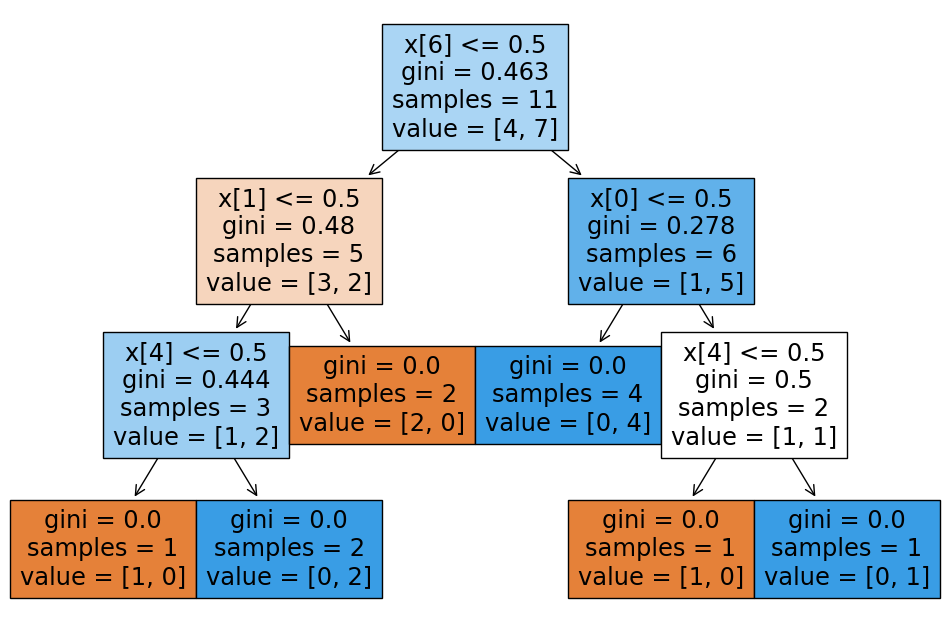

In [34]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

Accuracy on training data: 1.00
Accuracy on test data: 0.33


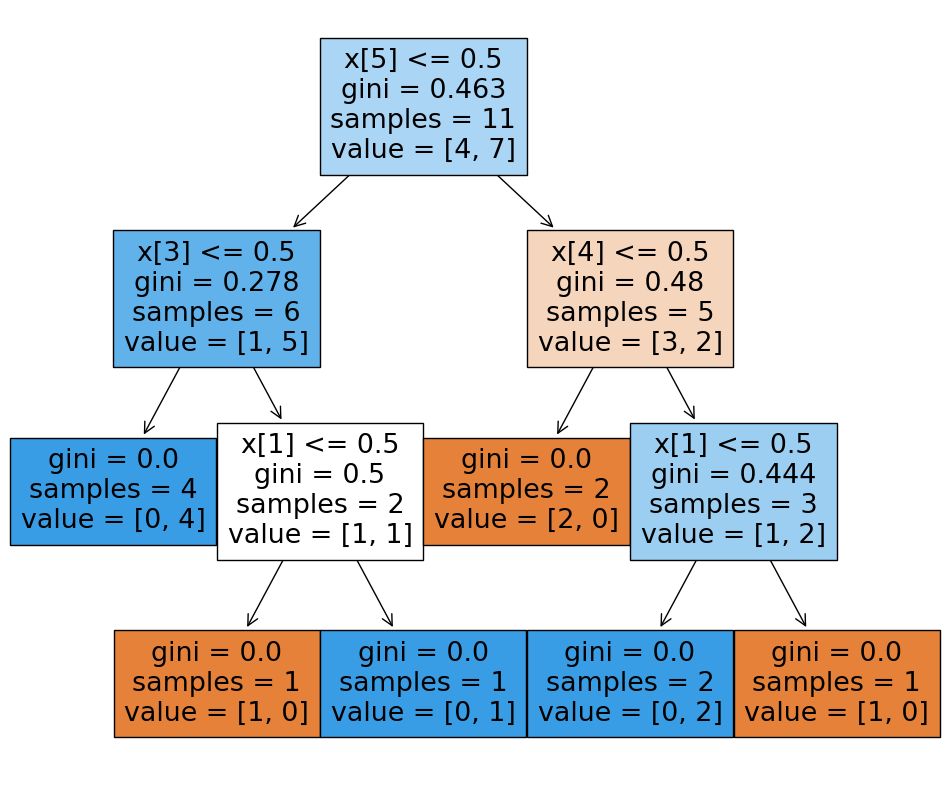

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on training data: {train_accuracy:.2f}")
print(f"Accuracy on test data: {test_accuracy:.2f}")

plt.figure(figsize=(12, ))
plot_tree(clf, filled=True)
plt.show()

Accuracy on training data: 1.00
Accuracy on test data: 0.33


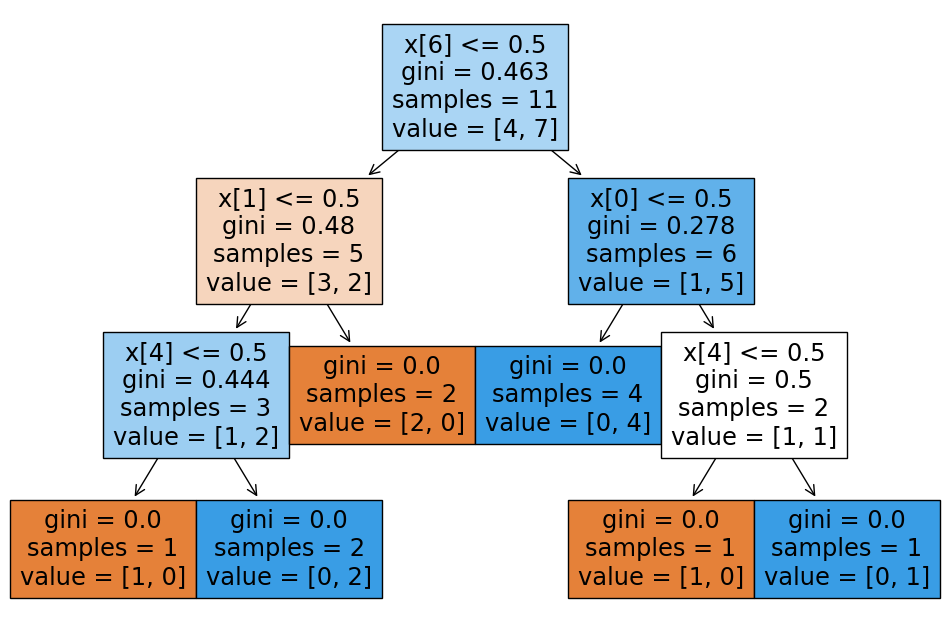

In [24]:
max_depth = 3  
clf = DecisionTreeClassifier(max_depth=max_depth)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on training data: {train_accuracy:.2f}")
print(f"Accuracy on test data: {test_accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

In [35]:
DecisionTreeClassifier(criterion="entropy")

DecisionTreeClassifier(criterion='entropy')

In [52]:

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_score_dt:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_dt}")

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_score_rf:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_rf}")

Decision Tree Classifier Metrics:
Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[1 0]
 [1 0]]

Random Forest Classifier Metrics:
Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[1 0]
 [1 0]]


C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
feature_importances = clf.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.2f}")
print(f"Number of estimators (decision trees): {len(clf.estimators_)}")

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Feature Importances:
age_senior: 0.24
age_young: 0.43
income_low: 0.03
income_medium: 0.08
student_yes: 0.06
credit_rating_fair: 0.17
Number of estimators (decision trees): 100
